In [8]:
from music21 import converter, note, chord, stream
import pandas as pd

def process_chords_and_ties(file_path):
    score = converter.parse(file_path)
    data = []
    
    for part in score.parts:
        for measure in part.getElementsByClass(stream.Measure):
            measure_start = measure.offset
            # Check if measure has voices
            if measure.voices:
                elements = measure.voices
            else:
                elements = [measure]  # Treat the entire measure as a single voice

            for container in elements:
                for element in container.notesAndRests:
                    local_offset = element.offset  # Local offset within the measure
                    global_offset = measure_start + local_offset  # Calculate global offset
                    if isinstance(element, chord.Chord):
                        for n in element.notes:
                            tie_status = n.tie.type if n.tie else "no tie"
                            data.append((measure.number, local_offset, global_offset, n.duration.quarterLength, str(n.pitch), n.pitch.midi, tie_status))
                    elif isinstance(element, note.Note):
                        tie_status = element.tie.type if element.tie else "no tie"
                        data.append((measure.number, local_offset, global_offset, element.duration.quarterLength, str(element.pitch), element.pitch.midi, tie_status))
    
    # Convert the list of data into a DataFrame
    df = pd.DataFrame(data, columns=['Measure', 'Local Onset', 'Global Onset', 'Duration', 'Pitch', 'MIDI', 'Tie'])
    return df


# Example usage
#file_path = r'C:\Users\egorp\nextcloud\code\playground\Chorale-Corpus-main\Bach,_Johann_Sebastian\Chorales\003\short_score.mxl'
file_path = r'C:\Users\egorp\Nextcloud\code\weimar\bwv18_5_isolated.xml'

df = process_chords_and_ties(file_path)
display(df)


,Measure,Local Onset,Global Onset,Duration,Pitch,MIDI,Tie
0,1,0.0,0.0,1.0,G4,67,no tie
1,2,0.0,1.0,1.0,G4,67,no tie
2,2,1.0,2.0,1.0,G4,67,no tie
3,2,2.0,3.0,1.0,F4,65,no tie
4,2,3.0,4.0,1.0,G4,67,no tie
5,3,0.0,5.0,1.0,E-4,63,no tie
6,3,1.0,6.0,1.0,D4,62,no tie
7,3,2.0,7.0,1.0,C4,60,no tie
8,3,3.0,8.0,0.5,G4,67,no tie
9,3,3.5,8.5,0.5,A4,69,no tie


In [12]:
from music21 import converter, note, chord, stream
import pandas as pd

def process_chords_and_ties(file_path):
    score = converter.parse(file_path)
    data = []
    
    for part in score.parts:
        for measure in part.getElementsByClass(stream.Measure):
            measure_start = measure.offset
            # Get time signature from measure
            time_sig = measure.timeSignature
            time_sig_str = f"{time_sig.numerator}/{time_sig.denominator}" if time_sig else "N/A"
            
            # Check if measure has voices
            if measure.voices:
                elements = measure.voices
            else:
                elements = [measure]  # Treat the entire measure as a single voice

            for container in elements:
                for element in container.notesAndRests:
                    local_offset = element.offset  # Local offset within the measure
                    global_offset = measure_start + local_offset  # Calculate global offset
                    if isinstance(element, chord.Chord):
                        for n in element.notes:
                            tie_status = n.tie.type if n.tie else "no tie"
                            data.append((measure.number, local_offset, global_offset, n.duration.quarterLength, str(n.pitch), n.pitch.midi, tie_status, time_sig_str))
                    elif isinstance(element, note.Note):
                        tie_status = element.tie.type if element.tie else "no tie"
                        data.append((measure.number, local_offset, global_offset, element.duration.quarterLength, str(element.pitch), element.pitch.midi, tie_status, time_sig_str))
    
    # Convert the list of data into a DataFrame
    df = pd.DataFrame(data, columns=['Measure', 'Local Onset', 'Global Onset', 'Duration', 'Pitch', 'MIDI', 'Tie', 'Time Signature'])
    return df

# Example usage
file_path = r'C:\Users\egorp\Nextcloud\code\weimar\bwv18_5_isolated.xml'
#file_path = r'C:\Users\egorp\nextcloud\code\playground\Chorale-Corpus-main\Bach,_Johann_Sebastian\Chorales\003\short_score.mxl'
df = process_chords_and_ties(file_path)
display(df)


,Measure,Local Onset,Global Onset,Duration,Pitch,MIDI,Tie,Time Signature
0,1,0.0,0.0,1.0,G4,67,no tie,4/4
1,2,0.0,1.0,1.0,G4,67,no tie,N/A
2,2,1.0,2.0,1.0,G4,67,no tie,N/A
3,2,2.0,3.0,1.0,F4,65,no tie,N/A
4,2,3.0,4.0,1.0,G4,67,no tie,N/A
5,3,0.0,5.0,1.0,E-4,63,no tie,N/A
6,3,1.0,6.0,1.0,D4,62,no tie,N/A
7,3,2.0,7.0,1.0,C4,60,no tie,N/A
8,3,3.0,8.0,0.5,G4,67,no tie,N/A
9,3,3.5,8.5,0.5,A4,69,no tie,N/A


In [1]:
from music21 import converter, note, chord, stream
import pandas as pd

def process_chords_and_ties(file_path):
    score = converter.parse(file_path)
    data = []
    measure_details = []  # Store measure details for comparison and analysis

    for part in score.parts:
        previous_time_signature = None
        for measure in part.getElementsByClass(stream.Measure):
            time_sig = measure.timeSignature or previous_time_signature
            if time_sig:
                time_sig_str = f"{time_sig.numerator}/{time_sig.denominator}"
                expected_length = time_sig.barDuration.quarterLength
                previous_time_signature = time_sig
            else:
                time_sig_str = previous_time_signature if previous_time_signature else "N/A"
                expected_length = None  # If there's no time signature, skip duration check
            
            total_duration = sum(n.duration.quarterLength for n in measure.notesAndRests)
            is_anacrusis = measure.number == 1 and total_duration < expected_length if expected_length else False
            measure_details.append((measure.number, total_duration, expected_length, time_sig_str, is_anacrusis))

    # Populate DataFrame with detailed data
    for part in score.parts:
        for measure in part.getElementsByClass(stream.Measure):
            elements = measure.voices if measure.voices else [measure]
            for container in elements:
                for element in container.notesAndRests:
                    local_offset = element.offset
                    global_offset = measure.offset + local_offset
                    if isinstance(element, chord.Chord):
                        for n in element.notes:
                            tie_status = n.tie.type if n.tie else "no tie"
                            measure_info = next((md for md in measure_details if md[0] == measure.number), None)
                            data.append((measure.number, local_offset, global_offset, n.duration.quarterLength, str(n.pitch), n.pitch.midi, tie_status, measure_info[3], "Yes" if measure_info[4] else "No"))
                    elif isinstance(element, note.Note):
                        tie_status = element.tie.type if element.tie else "no tie"
                        measure_info = next((md for md in measure_details if md[0] == measure.number), None)
                        data.append((measure.number, local_offset, global_offset, element.duration.quarterLength, str(element.pitch), element.pitch.midi, tie_status, measure_info[3], "Yes" if measure_info[4] else "No"))

    df = pd.DataFrame(data, columns=['Measure', 'Local Onset', 'Global Onset', 'Duration', 'Pitch', 'MIDI', 'Tie', 'Time Signature', 'Anacrusis'])

    # Post-processing to detect split measures
    for i, details in enumerate(measure_details):
        measure_number, total_duration, expected_length, _, _ = details
        if expected_length and total_duration < expected_length and not df[df['Measure'] == measure_number]['Anacrusis'].iloc[0] == "Yes":
            # If a measure's total duration is less than expected and it's not an anacrusis
            df.loc[df['Measure'] == measure_number, 'Split by Repeat'] = "Potential"
        else:
            df.loc[df['Measure'] == measure_number, 'Split by Repeat'] = "No"

    return df

# Example usage
file_path = r'C:\Users\egorp\Nextcloud\code\weimar\bwv18_5_isolated.xml'
df = process_chords_and_ties(file_path)
display(df)


,Measure,Local Onset,Global Onset,Duration,Pitch,MIDI,Tie,Time Signature,Anacrusis,Split by Repeat
0,1,0.0,0.0,1.0,G4,67,no tie,4/4,Yes,No
1,2,0.0,1.0,1.0,G4,67,no tie,4/4,No,No
2,2,1.0,2.0,1.0,G4,67,no tie,4/4,No,No
3,2,2.0,3.0,1.0,F4,65,no tie,4/4,No,No
4,2,3.0,4.0,1.0,G4,67,no tie,4/4,No,No
5,3,0.0,5.0,1.0,E-4,63,no tie,4/4,No,No
6,3,1.0,6.0,1.0,D4,62,no tie,4/4,No,No
7,3,2.0,7.0,1.0,C4,60,no tie,4/4,No,No
8,3,3.0,8.0,0.5,G4,67,no tie,4/4,No,No
9,3,3.5,8.5,0.5,A4,69,no tie,4/4,No,No


Pitch
G4     19
A4      8
F4      7
B-4     7
E-4     4
D4      3
C5      3
C4      2
A-4     1
D5      1
Name: count, dtype: int64


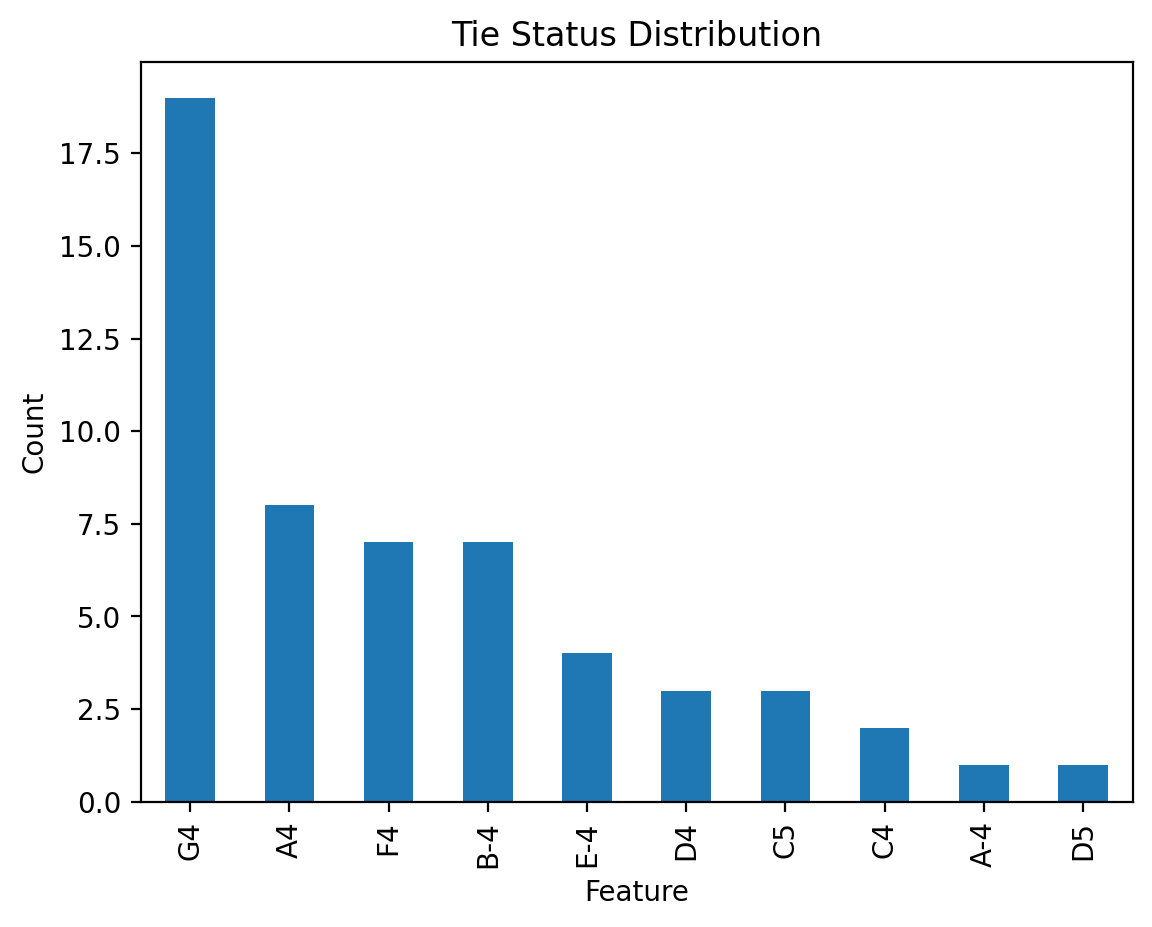

In [2]:
# Assuming df is your DataFrame and 'Tie' is the column with tie information
tie_counts = df['Pitch'].value_counts()

# Display the tie counts
print(tie_counts)

# Optionally, you can visualize these counts using a bar plot
import matplotlib.pyplot as plt

tie_counts.plot(kind='bar')
plt.title('Feature Distribution')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()


In [18]:
import pandas as pd

def merge_tied_notes(df):
    ongoing_ties = {}  # Tracks ongoing ties by Pitch
    results = []

    for index, row in df.iterrows():
        key = (row['Pitch'],)  # Use Pitch as key

        if row['Tie'] in ['start', 'continue']:
            if key in ongoing_ties:
                # Update the existing entry with increased duration
                ongoing_ties[key]['Duration'] += row['Duration']
            else:
                # Start a new tie
                ongoing_ties[key] = row.to_dict()
                ongoing_ties[key]['Tie'] = 'no tie'  # We'll remove tie info in final entry

        elif row['Tie'] == 'stop':
            if key in ongoing_ties:
                # Finish the tie by adding the duration of the stop
                ongoing_ties[key]['Duration'] += row['Duration']
                results.append(ongoing_ties.pop(key))
            else:
                # Edge case: a stop without a start, just add as is
                results.append(row.to_dict())

        else:
            # For notes with no ties
            results.append(row.to_dict())

    # In case there are any unprocessed starts or continues (which should not happen)
    for leftover in ongoing_ties.values():
        results.append(leftover)

    return pd.DataFrame(results)

# Merge tied notes
df_merged = merge_tied_notes(df)
display(df_merged)


,Measure,Local Onset,Global Onset,Duration,Pitch,MIDI,Tie
0,1,0.0,0.0,2.0,B4,71,no tie
1,1,2.0,2.0,1.0,E4,64,no tie
2,1,3.0,3.0,1.0,B4,71,no tie
3,1,0.0,0.0,2.0,E4,64,no tie
4,1,2.0,2.0,1.0,E4,64,no tie
...,...,...,...,...,...,...,...
178,13,1.0,49.0,1.0,A3,57,no tie
179,13,2.0,50.0,2.0,G#3,56,no tie
180,13,0.0,48.0,1.0,G#2,44,no tie
181,13,1.0,49.0,1.0,A2,45,no tie


In [2]:
import plotly.graph_objects as go
import numpy as np

def plot_piano_roll(df, quarter_length_ticks=4):
    fig = go.Figure()

    # Define colors
    note_fill_color = 'lightgreen'  # A light color that contrasts well with black
    note_line_color = 'black'      # Black outline

    # Add a rectangle for each note using shapes
    for index, row in df.iterrows():
        fig.add_shape(
            # Rectangle representing each note
            type="rect",
            x0=row['Global Onset'],  # Start of the note
            y0=row['MIDI'] - 0.4,    # Slightly lower y to make the rectangle centered on the pitch
            x1=row['Global Onset'] + row['Duration'],  # End of the note
            y1=row['MIDI'] + 0.4,    # Slightly higher y to make the rectangle centered on the pitch
            line=dict(
                color=note_line_color,
                width=1
            ),
            fillcolor=note_fill_color
        )

    # Calculate max global onset for setting x-axis range
    max_global_onset = max(df['Global Onset'] + df['Duration'])

    # Setting custom x-axis ticks based on the quarter length value
    x_ticks = np.arange(0, max_global_onset + quarter_length_ticks, step=quarter_length_ticks)

    # Update the layout to better represent a piano roll
    fig.update_layout(
        title="Piano Roll Visualization",
        xaxis_title="Global Onset (in quarter lengths)",
        yaxis_title="MIDI Note Number",
        xaxis=dict(
            showgrid=True,
            zeroline=False,
            tickvals=x_ticks,
            range=[0, max_global_onset + 1]
        ),
        yaxis=dict(
            showgrid=True,
            zeroline=False,
            range=[min(df['MIDI']) - 1, max(df['MIDI']) + 1]
        ),
        #showlegend=False
    )

    # Show the figure
    fig.show()

# Example usage: quarter_length_ticks set to 4

plot_piano_roll(df, quarter_length_ticks=4)
plot_piano_roll(df_merged, quarter_length_ticks=4)


NameError: name 'df' is not defined